# Voluntary Problem Set

This problem set allows you to play around with concepts from class and to solve some smaller problems on your own.


# Topic: Factor Structure in Squared Returns

Note: Squared Returns are ONE way to get a quick and dirty proxy for realized variance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

## A. Load-in cleaned Daily log Return Data for ES 50 constituents (as used in class)

Note: 
    - First observation is: January 5th 2000
    - Last observation is:  November 12th 2020
    - Nr of columns: 43 (42 firms and the equal-weight portfolio)

In [2]:
r_df = pd.read_csv("r_ES50_d_cleaned_realized_Nov2020.csv", parse_dates=True, index_col=0)
r_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5383 entries, 2000-01-05 to 2020-11-12
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ADS.DE    5383 non-null   float64
 1   AI.PA     5383 non-null   float64
 2   ALV.DE    5383 non-null   float64
 3   ASML.AS   5383 non-null   float64
 4   CS.PA     5383 non-null   float64
 5   BBVA.MC   5383 non-null   float64
 6   SAN.MC    5383 non-null   float64
 7   BAS.DE    5383 non-null   float64
 8   BAYN.DE   5383 non-null   float64
 9   BMW.DE    5383 non-null   float64
 10  BNP.PA    5383 non-null   float64
 11  CRG.IR    5383 non-null   float64
 12  SGO.PA    5383 non-null   float64
 13  DAI.DE    5383 non-null   float64
 14  DTE.DE    5383 non-null   float64
 15  ENEL.MI   5383 non-null   float64
 16  ENGI.PA   5383 non-null   float64
 17  ENI.MI    5383 non-null   float64
 18  EOAN.DE   5383 non-null   float64
 19  FRE.DE    5383 non-null   float64
 20  BN.PA     53

## B. Create a Pandas DataFrame of cross-sectional Variance, using Squared Daily Returns 
$$
\\
$$

Note: 
    - First, call that object: Var_r_mth1

In [3]:
Var_r_mth1 = r_df.apply(lambda x: x**2)

## C. Visualize the Time-Series of the Annualized Market Volatility (in %)  (i.e. equal weight portfolio)

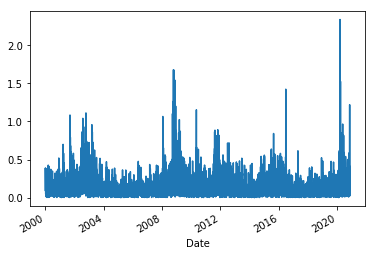

In [4]:
vol_r_mth1 = Var_r_mth1.apply(lambda x: np.sqrt(x*252)) # annualize

vol_r_mth1["1/N"].plot()
plt.show()

## D. Which Observations stand out?

- 1. with regards to the peaks?

- 2. with regard to whether or not vol clusters?

- 3. with regard to whether vol changes abruptly or smoothly?

- 4. Are the absolute magnitudes realistic?

1. Late 2020 (Covid), 2009 the (financial crisis), 2016 ?
2. Yes, it clusters
3. Depends, Dotcom crisis was rather smooth, covid was not
4. ?

## E. Which Learning Points can you extract from the previous picture about what a good model for market vol shall look like?

    - 1. Market volatility is [constant / time-varying].
    - 2. Market Volatility is driven by diffusive innovations ONLY? [yes / no]
    - 3. Market Volatility is driven by jumpy innovations ONLY? [yes / no]
    - 4. Market Volatility is driven by both, diffusive and jump innovations? [yes / no]

1. Time-variy
2. No
3. No
4. Yes


## F. Plot the Volatility of VOW.DE (annualized and in %)

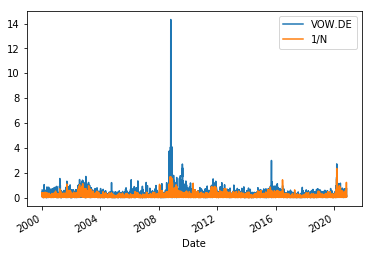

In [5]:
vol_r_mth1[["VOW.DE", "1/N"]].plot()
plt.show()

## F.1 What is the Fundamental Event that caused Vol to go above 1400%?

The Volkswagen 'infinity' squeeze. 

## F.2 Is a 1400% Vol Realistic?

It is very unlikely in a 'regular' environment. The high amount of short positions held at this time (which were due at some point) at corresponding panic after a statement from Porsche, explains this extraordinary volatility though.

## G. Plot All Daily Volatilities (annualized and in %)

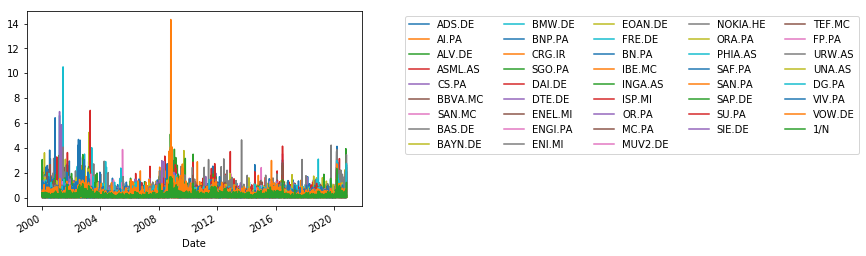

In [6]:
vol_r_mth1.plot()
plt.legend(loc='upper right', bbox_to_anchor=(2.5, 1), ncol=5)
plt.show()

## G.1 Which Observations stand out?

    - 1. Common and idiosyncratic moves in vol are visible? [yes | no]
    
    - 2. Volatility clusters? [yes | no]
    
    - 3. Volatility is driven by diffusive shocks with sudden upward and downward jumps? [yes | no]
    
    - 4. Cross-sectional vol appears to be driven by a low dimensional factor structure? [yes | no]

1. Yes
2. yes
3. yes
4. Yes

## H. Is Daily Market Volatility Stationary?

**Yes**

## I. Linear Factor Structure in Cross-Sectional Variance 

## I.1 How much Variance do each of the first 4 most important PCs explain? Round to two decimals

Note: Use the variance panel from above  as the input to the PCA BUT ignore the equal weight portfolio. 

Variance explained of

    - PC1 is []
    
    - PC2 is []
    
    - PC3 is []
    
    - PC4 is []

In [7]:
df = Var_r_mth1.drop(columns="1/N")

pca = PCA(4)
df_trans = pd.DataFrame(pca.fit_transform(df), index=df.index)
df_trans_abs = df_trans.apply(lambda x: np.abs(x))
[round(x, 2) for x in pca.explained_variance_ratio_]

[0.42, 0.17, 0.11, 0.04]

## I.2 Visualize the time-series of the first three PCs  

Note: Create a 2x2 subplot where the time-series of market variance is on the last quadrant

/anaconda3/envs/prim/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


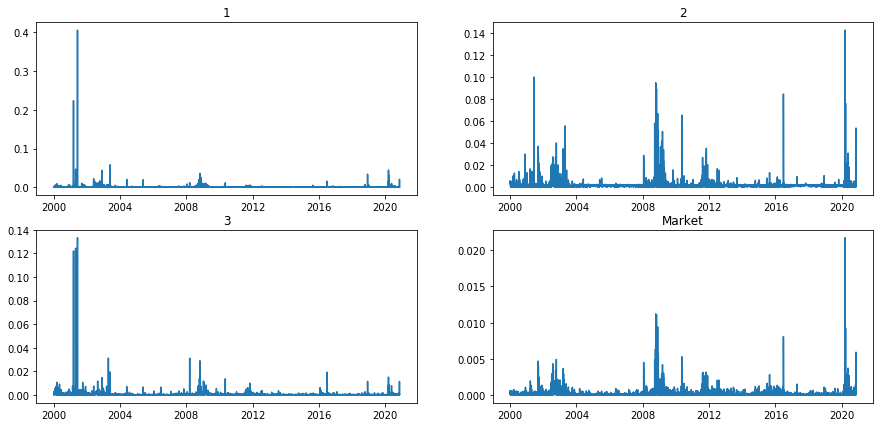

In [8]:
idx = 221

plt.figure(figsize=(15,7))

for pc in df_trans.columns:
    plt.title(pc)
    plt.plot(df_trans_abs[pc])
    plt.subplot(idx)
    idx += 1
    
plt.plot(Var_r_mth1["1/N"])
plt.title("Market")
plt.subplot(224)

plt.show()

## I.3 Noteworthy Observations and Learning Points

    - 1. Does the time-series of PC1 look similar to the time-series of market variance? [yes | no]
    
    - 2. Does the time-series of PC1 look similar to the time-series of VOW.DE's variance? [yes | no]
    
    - 3. How do you explain the observation?  [coincidence / unscaled data set / cannot explain]
    
    Hint: Read first two paragraphs of the introduction: 
    
    https://www.ml.uni-saarland.de/code/trpca/PodSetHei-gcpr14-supp.pdf
    
    - 4. How to overcome this somewhat strange observation? [leave it, its fine / normalize data / erase abnormal data points]
    
    
    Hint:
    
    https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

1. No
2. Yes (somehow)
3. Unscaled data
4. normalize

## I.4 How large is the correlation of PC1 with the variance of VOW.DE and the market's variance? Round to two decimals. 

In [9]:
round(np.corrcoef(df_trans.iloc[:,0], df["VOW.DE"])[0][1],2)

1.0

In [10]:
round(np.corrcoef(df_trans.iloc[:,0], Var_r_mth1["1/N"])[0][1], 2)

0.11

## J. Linear Factor Structure for STANDARDIZED Cross-Sectional Variance
$$
\\
$$

Note: Repeat the analysis from the previous Topic ("I") BUT use the z-score of each variance as the input to the PCA, (again: ignore the equal weight portfolio). Answer the following questions

- 1. What is the correlation between PC1 and the market's variance? Round to two decimals.


- 2. Is there support for a single-index model in cross-sectional variance, where the market's variance is the single factor? [yes / no]

In [11]:
from sklearn.preprocessing import StandardScaler
df = Var_r_mth1.drop(columns="1/N")

sc = StandardScaler()
df_norm = pd.DataFrame(sc.fit_transform(df), index=df.index)

pca_sc = PCA(4)
df_norm_trans = pd.DataFrame(pca_sc.fit_transform(df_norm), index=df_norm.index)
df_norm_trans

,0,1,2,3
Date,,,,
2000-01-05,3.309750,-5.568333,-1.304580,0.628182
2000-01-06,4.935881,-4.905038,2.015283,-2.466320
2000-01-07,3.267438,-7.780722,-0.445840,1.101325
2000-01-10,0.936308,-1.825379,-0.668864,0.477440
2000-01-11,0.821862,0.497669,0.164389,0.304082
...,...,...,...,...
2020-11-06,-0.765510,0.263461,-0.235707,-0.238203
2020-11-09,38.288428,21.036325,-13.258496,2.019488
2020-11-10,6.688831,7.344132,-5.491959,0.863716


In [12]:
# Correlation PC1 - Market
round(np.corrcoef(df_norm_trans.iloc[:,0], Var_r_mth1["1/N"])[0][1], 2)

0.95

## K: Collection of Learning Points and Punchlines

1. Imprecise variance estimates [can / cannot] lead to imprecise PCs

2. PCA [should / should not] be applied to normalized data

3. The z-score is [one useful / the only useful] normalization scheme

4. Implications for a single-index model for cross-sectional variance [do / do not] change depending on whether one works with unnormalized or normalized data

5. There is [weak / strong] support that cross-sectional (normalized) variance follows a single-index model with the (normalized) market variance being the single factor

6. Roughly [30% / 70%] of variations in EU Blue Chip's (normalized) Return Variance is firm-specific

1. **Can**
2. PCA **should** be applied to normalized data
3. The z-score is **one useful** normalization scheme
4. **do**
5. **weak** (Apparently strong)
6. **70%** (Why 30?)

## L. Cross-sectional Average of Skewness and Kurtosis

## L.1. How Large is the cross-sectional average of skewness and kurtosis of Return Variance (i.e. squared returns)? Round to two decimals

In [167]:
from scipy.stats import skew, kurtosis

sk = round(np.mean([ skew(Var_r_mth1[col]) for col in Var_r_mth1.columns]), 2)
kurt = round(np.mean([ kurtosis(Var_r_mth1[col]) for col in Var_r_mth1.columns]),2)

print(f"Skewness is {sk}, Kurtosis is {kurt}")

Skewness is 17.6, Kurtosis is 598.91


## L.2. What are implications for parametric models of return variance?

- 1. Strong positive skew in the variance of returns can be captured by [stochastic volatility / jumps / upward jumps] in the variance equation.

- 2. Huge excess kurtosis in the variance of returns can be captured by [stochastic volatiltiy / vol in vol / upward jumps] in the variance equation

## M. Variance Forecast for next periods?

    - 1. Can one do simple manipulations to squared returns to get forecasts of future variance? [yes / no]
    
    - 2. How do you evaluate the approach of fitting squared returns to an ARMA(p,q) parametrization to get variance forecasts? [optimistic / pessimistic]
     
    - 3. Are there variance measures with less measurement errors? [yes / no]